In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflixdataset/dataset - netflix1.csv


# Identifying and Replacing Null Values


# Step 1: Importing necessary dependencies

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec



# Used for choosing most frequently shown country.
from collections import Counter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
sns.set_theme(style= 'darkgrid', palette = 'pastel')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/netflixdataset/dataset - netflix1.csv


# Step2: Read and load the dataset

In [3]:
df_net=pd.read_csv('/kaggle/input/netflixdataset/dataset - netflix1.csv')
df_net.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
# Step3: Getting Information Of Each Column

In [5]:
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


# Step4:Detect Null Values/NaN Values in Dataset

In [6]:
df_net.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

***All are 0's i.e., No Null Values are Presented In The Dataset.***



> *NO NULL VALUES ARE PRESENTED*

**DATA SET IS CLEAN.**

#  Detect and Remove Outliners
*Z-score Treatment For release_year*

# Step 1: Importing necessary dependencies 
# Step2: Read and load the dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/netflixdataset/dataset - netflix1.csv")
df.sample(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
2447,s3137,Movie,Game,Abhinay Deo,India,12/15/2019,2011,TV-14,135 min,"International Movies, Thrillers"
4142,s5797,Movie,Sample This,Dan Forrer,United States,9/15/2016,2012,TV-14,83 min,"Documentaries, Music & Musicals"
2491,s3196,Movie,Jindua,Navaniat Singh,India,12/1/2019,2017,TV-14,135 min,"Dramas, International Movies, Romantic Movies"
4328,s6047,Movie,A Most Violent Year,J.C. Chandor,United Arab Emirates,7/22/2018,2014,R,125 min,"Dramas, Thrillers"
3994,s5573,Movie,"Bon Cop, Bad Cop",Erik Canuel,Canada,3/15/2017,2006,TV-MA,117 min,"Action & Adventure, Comedies, International Mo..."


# Step 3: Plot the distribution plots for the features

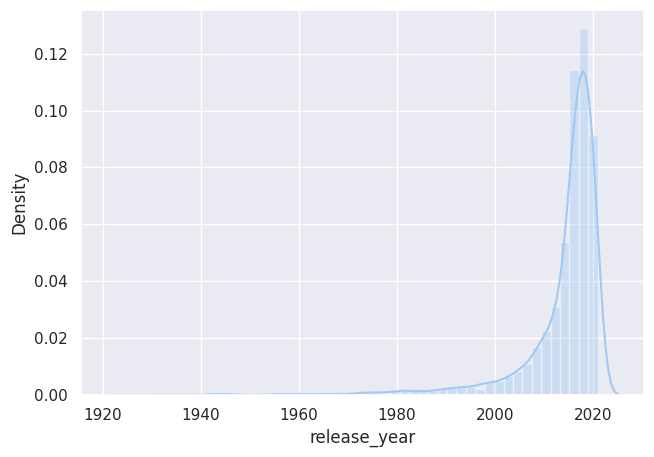

In [8]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["release_year"])

plt.show()

In [9]:
print(df.release_year)

0       2020
1       2021
2       2021
3       2021
4       1993
        ... 
8785    2016
8786    2016
8787    2012
8788    2016
8789    2016
Name: release_year, Length: 8790, dtype: int64


# Step 4: Finding the boundary values

In [10]:
print('Highest allowed',df["release_year"].mean() + 3*df["release_year"].std())
print('Lowest allowed',df["release_year"].mean() - 3*df["release_year"].std())



Highest allowed 2040.6595607699119
Lowest allowed 1987.7067645998263


# Step 5: Finding the outliers

In [11]:
df[(df["release_year"] > 2040.65) | (df["release_year"] < 1987.70)]



,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
60,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas"
61,s43,Movie,Jaws 2,Jeannot Szwarc,United States,9/16/2021,1978,PG,116 min,"Dramas, Horror Movies, Thrillers"
62,s44,Movie,Jaws 3,Joe Alves,United States,9/16/2021,1983,PG,98 min,"Action & Adventure, Horror Movies, Thrillers"
63,s45,Movie,Jaws: The Revenge,Joseph Sargent,United States,9/16/2021,1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers"
182,s132,Movie,Blade Runner: The Final Cut,Ridley Scott,United States,9/1/2021,1982,R,117 min,"Action & Adventure, Classic Movies, Cult Movies"
...,...,...,...,...,...,...,...,...,...,...
8649,s7879,TV Show,Robotech,Not Given,United States,10/1/2016,1985,TV-MA,1 Season,Anime Series
8661,s7994,TV Show,Shaka Zulu,Not Given,Italy,1/10/2019,1986,TV-14,1 Season,TV Dramas
8697,s8190,TV Show,The Andy Griffith Show,Not Given,United States,7/1/2017,1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies"
8702,s8232,Movie,The Bund,Not Given,Hong Kong,9/20/2018,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies"


# Step 6: Trimming of outliers

In [12]:
new_df = df[(df["release_year"] < 2040.65) & (df["release_year"] > 1987.70)]
new_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


# Step 7: Capping on outliers

In [13]:
upper_limit = df["release_year"].mean() + 3*df["release_year"].std()
lower_limit = df["release_year"].mean() - 3*df["release_year"].std()

# Step 8: Now, apply the capping

In [14]:
df["release_year"] = np.where(
df["release_year"]>upper_limit,
upper_limit,
np.where(
df["release_year"]<lower_limit,
lower_limit,
df["release_year"]))

# Step 9: Now, see the statistics using the “Describe” function

In [15]:
df["release_year"].describe()

count    8790.000000
mean     2014.516879
std         7.216340
min      1987.706765
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

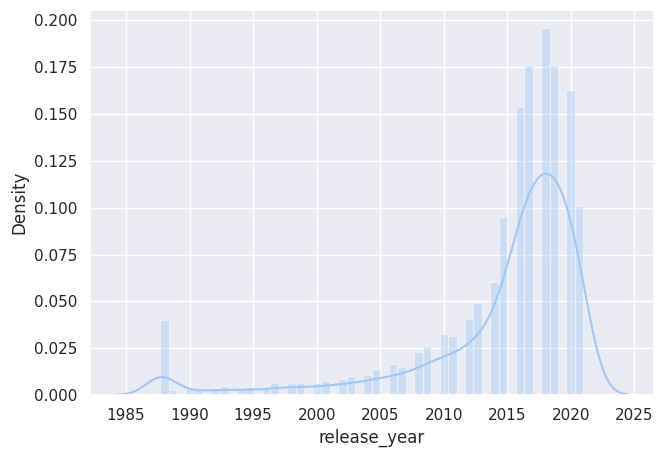

In [16]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["release_year"])

plt.show()

**CONVERTING THE SEASONS IN THE DURATION COLUMN TO MINUTES(ASSUMMING 1 SEASON=60 MIN)**

In [17]:
import re
def convert_duration(duration_str):
    # Extract numeric values using regular expression
    numeric_values = re.findall(r'\d+', duration_str)
    
    if numeric_values:
        numeric_value = int(numeric_values[0])
        if 'min' in duration_str:
            # If 'min' is present, it's in minutes
            return numeric_value
        elif 'Season' in duration_str:
            # If 'season' is present, assume 60 minutes per season
            return numeric_value * 60
    
    return None  # Handle other cases if needed

# Apply the function to the 'duration' column and create a new 'duration_minutes' column
df['minutes'] = df['duration'].apply(convert_duration)

# Print the DataFrame
print(df)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   duration  \
0     United States 

*This completes our Z-score-based technique!*

# IQR Based Filtering
*For the duration_minutes*

# Step-1: Import necessary dependencies
*import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns*
# Step-2: Read and load the dataset
*df = pd.read_csv('filepath')
df.head()*
# Step-3: Plot the distribution plot for the features


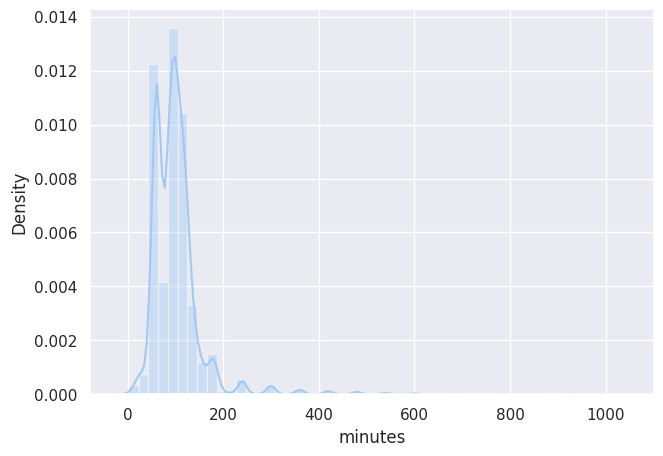

In [18]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,2)
sns.distplot(df['minutes'])
plt.show()

# Step-4: Form a box-plot for the skewed feature

<Axes: >

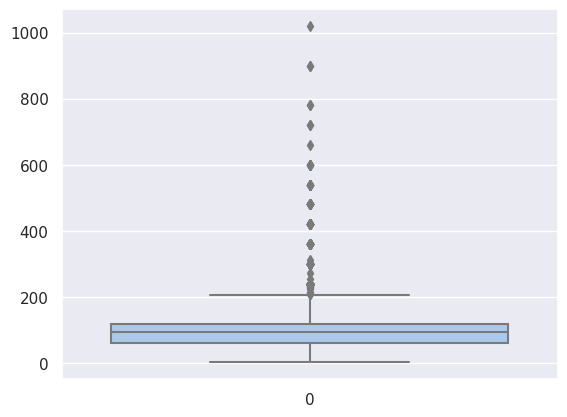

In [19]:
sns.boxplot(df['minutes'])

# Step-5: Finding the IQR

In [20]:
percentile25 = df['minutes'].quantile(0.25)
percentile75 = df['minutes'].quantile(0.75)

# Step-6: Finding the upper and lower limits

In [21]:
upper_limit = percentile75 + 1.5 
lower_limit = percentile25 - 1.5 

# Step-7: Finding outliers

In [22]:
df[df['minutes'] > upper_limit]
df[df['minutes'] < lower_limit]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,minutes
13,s471,Movie,Bridgerton - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,7/13/2021,2021.0,TV-14,39 min,Movies,39
14,s730,Movie,Bling Empire - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,6/12/2021,2021.0,TV-MA,36 min,Movies,36
15,s731,Movie,Cobra Kai - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,6/12/2021,2021.0,TV-MA,34 min,Movies,34
16,s913,Movie,The Circle - The Afterparty,"Krysia Plonka, Kristian Mercado",United States,5/7/2021,2021.0,TV-14,35 min,Comedies,35
19,s3232,Movie,True: Winter Wishes,"Mark Thornton, Todd Kauffman",United States,11/26/2019,2019.0,TV-Y,46 min,Children & Family Movies,46
...,...,...,...,...,...,...,...,...,...,...,...
8625,s7776,Movie,Power Rangers Samurai: Clash of the Red Rangers,Not Given,United States,1/1/2016,2011.0,TV-Y7,46 min,Children & Family Movies,46
8626,s7777,Movie,Power Rangers Samurai: Party Monsters (Hallowe...,Not Given,United States,1/1/2016,2011.0,TV-Y7,24 min,Movies,24
8627,s7781,Movie,Power Rangers Super Samurai: Stuck on Christmas,Not Given,United States,1/1/2016,2012.0,TV-Y7,24 min,"Children & Family Movies, Sci-Fi & Fantasy",24
8628,s7782,Movie,Power Rangers Super Samurai: Trickster Treat,Not Given,United States,1/1/2016,2012.0,TV-Y7,23 min,Movies,23


# Step-8: Trimming outliers

In [23]:
new_df = df[df['minutes'] < upper_limit]
new_df.shape

(6719, 11)

# Step-9: Compare the plots after trimming

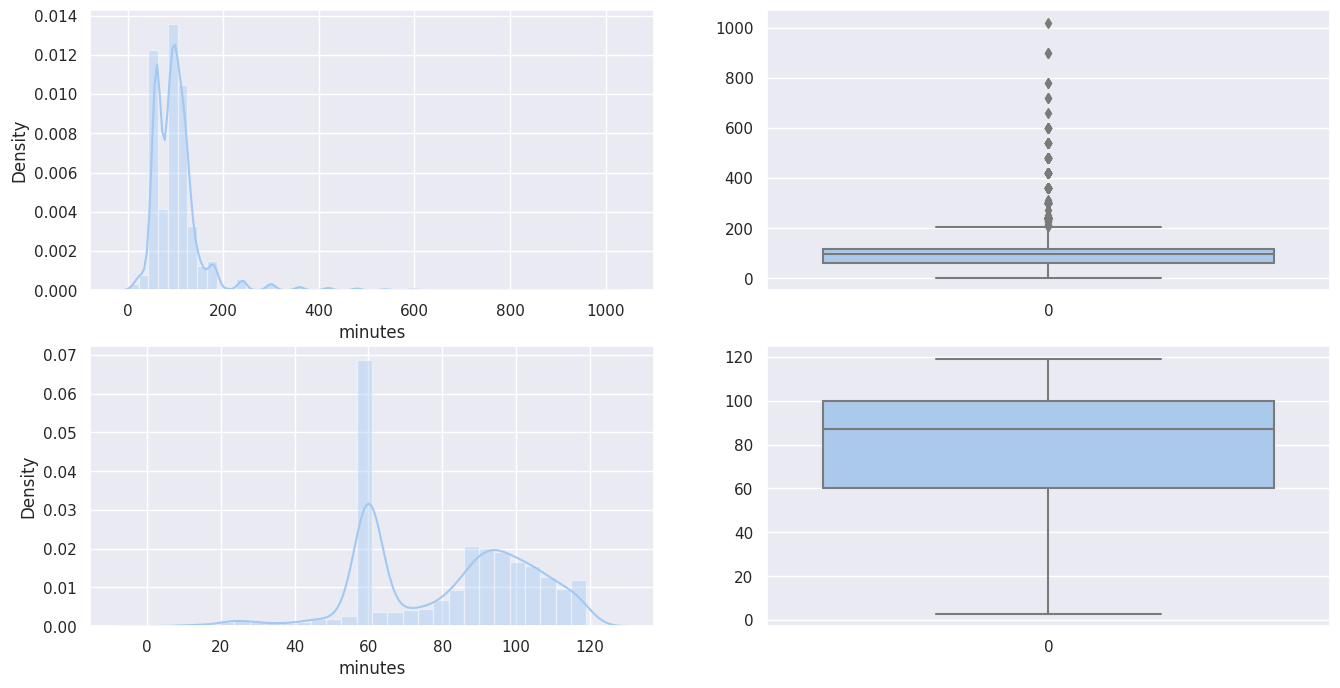

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['minutes'])
plt.subplot(2,2,2)
sns.boxplot(df['minutes'])
plt.subplot(2,2,3)
sns.distplot(new_df['minutes'])
plt.subplot(2,2,4)
sns.boxplot(new_df['minutes'])
plt.show()

# Step-10: Capping

In [25]:
new_df_cap = df.copy()
new_df_cap['minutes'] = np.where(
    new_df_cap['minutes'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['minutes'] < lower_limit,
        lower_limit,
        new_df_cap['minutes']))

# Step-11: Compare the plots after capping

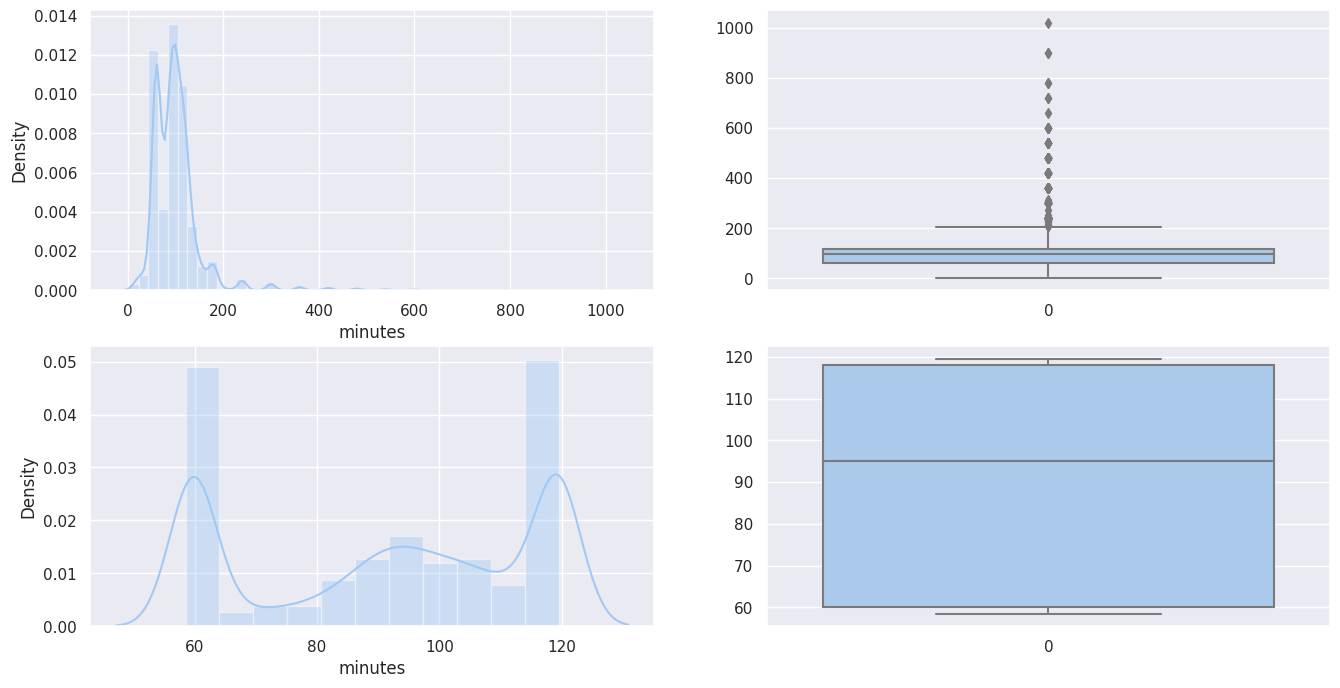

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['minutes'])
plt.subplot(2,2,2)
sns.boxplot(df['minutes'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['minutes'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['minutes'])
plt.show()


**This completes our IQR-based technique!**